In [1]:
#Import libraries:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

# Import and alias pyplot from matplotlib
import matplotlib.pyplot as plt

# Set plots to plot inline
%matplotlib inline 

# Import StatsModels for OLS
import statsmodels.api as sm

from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import metrics #
from sklearn.metrics import classification_report

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Question 1

In [2]:
#Load the data:
data = pd.read_csv('wdbc.csv.bz2')
data.head()

,id,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [4]:
#Summary Statistics

#Missing observations::

data.isnull().sum()

id                   0
diagnosis            0
radius.mean          0
texture.mean         0
perimeter.mean       0
area.mean            0
smoothness.mean      0
compactness.mean     0
concavity.mean       0
concpoints.mean      0
symmetry.mean        0
fracdim.mean         0
radius.se            0
texture.se           0
perimeter.se         0
area.se              0
smoothness.se        0
compactness.se       0
concavity.se         0
concpoints.se        0
symmetry.se          0
fracdim.se           0
radius.worst         0
texture.worst        0
perimeter.worst      0
area.worst           0
smoothness.worst     0
compactness.worst    0
concavity.worst      0
concpoints.worst     0
symmetry.worst       0
fracdim.worst        0
dtype: int64

In [5]:
x=data.describe()
x
# data.iloc[:,31]

,id,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
mean_std=x.loc['mean':'std',:]
mean_std.T

,mean,std
id,3.037183e+07,1.250206e+08
radius.mean,1.412729e+01,3.524049e+00
texture.mean,1.928965e+01,4.301036e+00
perimeter.mean,9.196903e+01,2.429898e+01
area.mean,6.548891e+02,3.519141e+02
smoothness.mean,9.636028e-02,1.406413e-02
compactness.mean,1.043410e-01,5.281276e-02
concavity.mean,8.879932e-02,7.971981e-02
concpoints.mean,4.891915e-02,3.880284e-02
symmetry.mean,1.811619e-01,2.741428e-02


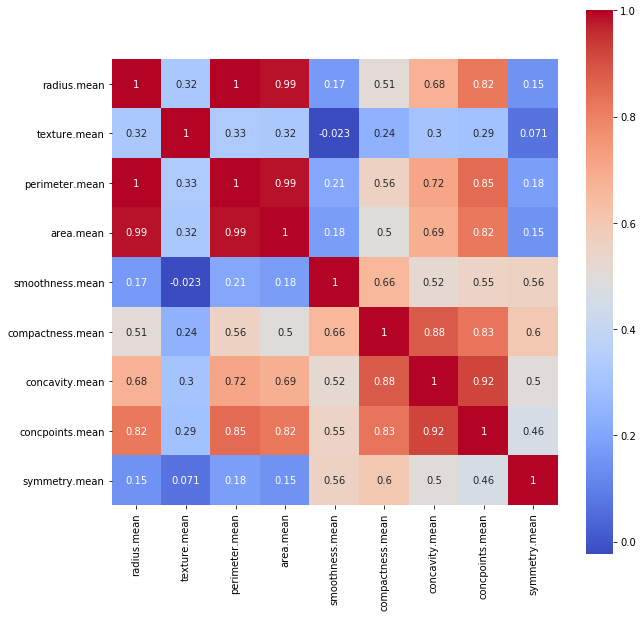

In [7]:
#We are interested mainly in the mean values of the features, so we will separate those features in the list below in order to make some work easier and the code more readably.
features_mean= list(data.columns[1:11])
#heat map of the correlations between the features
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


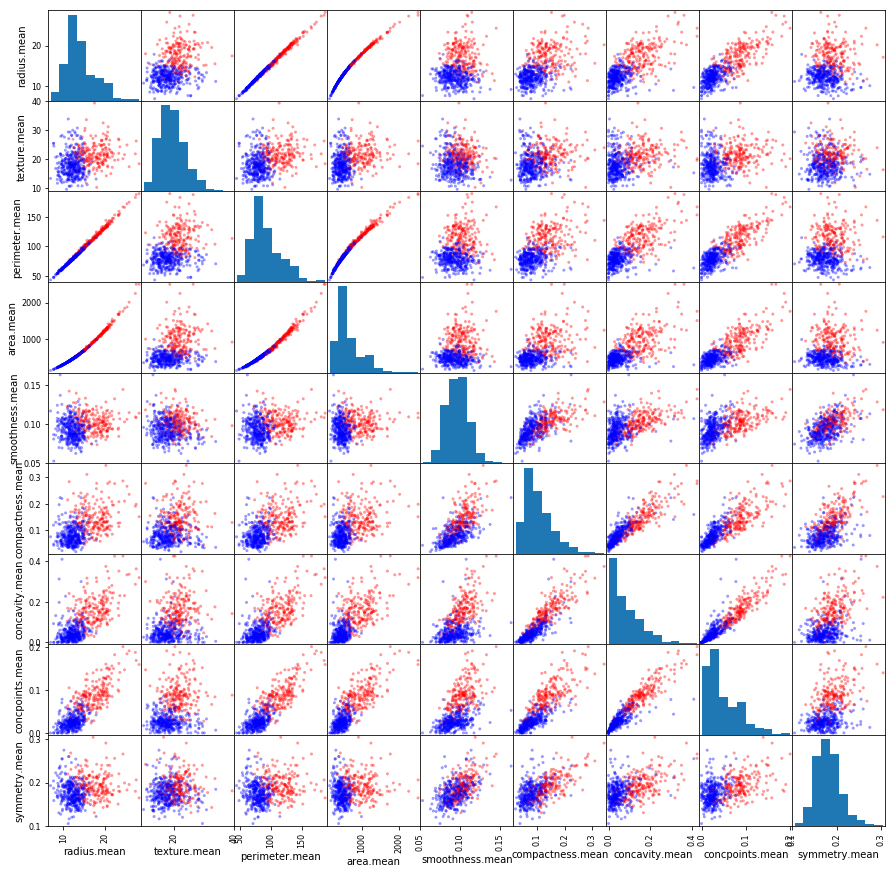

In [8]:
#create a scatter matrix with the features. The red dots correspond to malignant diagnosis and blue to benign

color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

In [9]:
#The algorithms will process only numerical values. For this reason, we will transform the categories M and B into values 1 and 0, respectively.

diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [10]:
#correlation:
data.corr().transpose().diagnosis

id                   0.039769
diagnosis            1.000000
radius.mean          0.730029
texture.mean         0.415185
perimeter.mean       0.742636
area.mean            0.708984
smoothness.mean      0.358560
compactness.mean     0.596534
concavity.mean       0.696360
concpoints.mean      0.776614
symmetry.mean        0.330499
fracdim.mean        -0.012838
radius.se            0.567134
texture.se          -0.008303
perimeter.se         0.556141
area.se              0.548236
smoothness.se       -0.067016
compactness.se       0.292999
concavity.se         0.253730
concpoints.se        0.408042
symmetry.se         -0.006522
fracdim.se           0.077972
radius.worst         0.776454
texture.worst        0.456903
perimeter.worst      0.782914
area.worst           0.733825
smoothness.worst     0.421465
compactness.worst    0.590998
concavity.worst      0.659610
concpoints.worst     0.793566
symmetry.worst       0.416294
fracdim.worst        0.323872
Name: diagnosis, dtype: float64

2.1 kNN Case

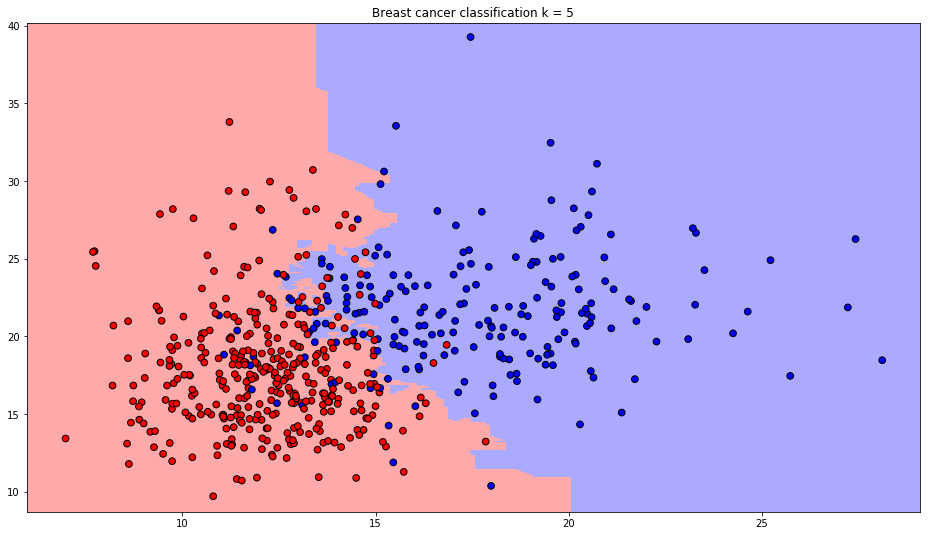

In [11]:
#picking the features (radius.mean and texture.mean)
X=data.as_matrix(columns=data.columns[2:4])
y=np.array(data['diagnosis'])
n = 5  #number of neighbors
p = 1
wisc_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wisc_clf.fit(X, y)
pred=wisc_clf.predict(X)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Z = wisc_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Breast cancer classification k = %i"
          % (n))
plt.show()

In [12]:
#Accuracy-
metrics.accuracy_score(y,pred)

#According to my opinion, Knn does pick up noise which can be seen by the blue strand at the bottom
#Small K results in noisy predictions and large k results in over-simplified predictions.

0.9173989455184535

2.2 Logistic Regression

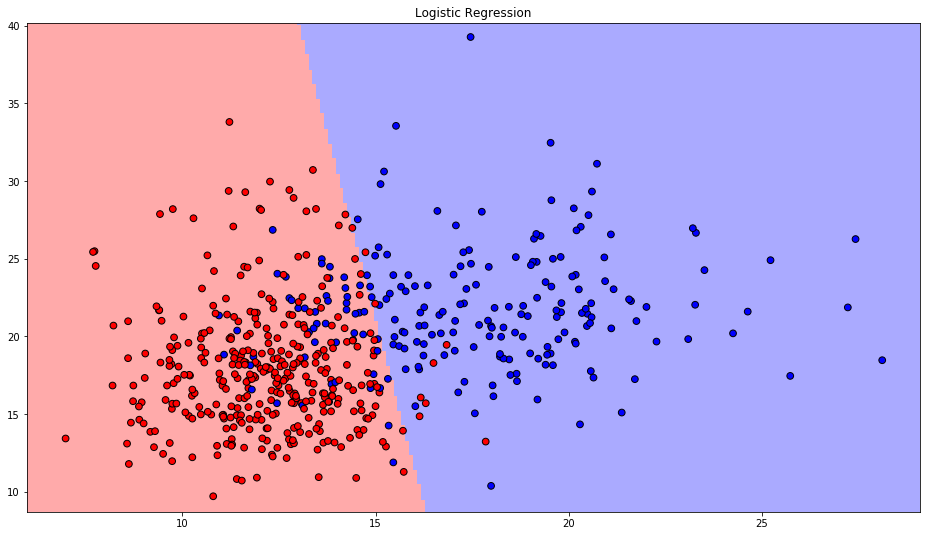

In [13]:
#picking the features (radius.mean and texture.mean)
X=data.as_matrix(columns=data.columns[2:4])
y=np.array(data['diagnosis'])

log_reg=LogisticRegression()

log_reg.fit(X, y)
pred1=log_reg.predict(X)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))



cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression")
plt.show()

In [14]:
#Accuracy-
metrics.accuracy_score(y,pred1)
#Logistic regression offers relatively lower accuracy
#No noise picked up in logistic regression. Better decision boundary.

0.8927943760984183

2.3 Feature Engineering

In [15]:
X=data[['radius.mean','texture.mean']]
y=data.diagnosis

x2=X
x2['mult']=X.iloc[:,0]*X.iloc[:,1]
x2['sqrt']=np.sqrt(X.iloc[:,0])
x2.head()



C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,radius.mean,texture.mean,mult,sqrt
0,17.99,10.38,186.7362,4.241462
1,20.57,17.77,365.5289,4.535416
2,19.69,21.25,418.4125,4.437342
3,11.42,20.38,232.7396,3.379349
4,20.29,14.34,290.9586,4.504442


In [16]:
x3=x2.drop(['radius.mean','texture.mean'],axis=1)

In [17]:
x3.head()

,mult,sqrt
0,186.7362,4.241462
1,365.5289,4.535416
2,418.4125,4.437342
3,232.7396,3.379349
4,290.9586,4.504442


In [18]:

log_reg.fit(x2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
pred3=log_reg.predict(x2)

In [20]:
metrics.accuracy_score(y,pred3)
#Accuracy improved slightly


0.8998242530755711

In [21]:
log_reg.fit(x3,y)
#Plotting decision regions
x_min2, x_max2 = x3.iloc[:, 0].min() - 1, x3.iloc[:, 0].max() + 1
y_min2, y_max2 = x3.iloc[:, 1].min() - 1, x3.iloc[:, 1].max() + 1

xx2, yy2 = np.meshgrid(np.arange(x_min2, x_max2, 0.1), np.arange(y_min2, y_max2, 0.1))

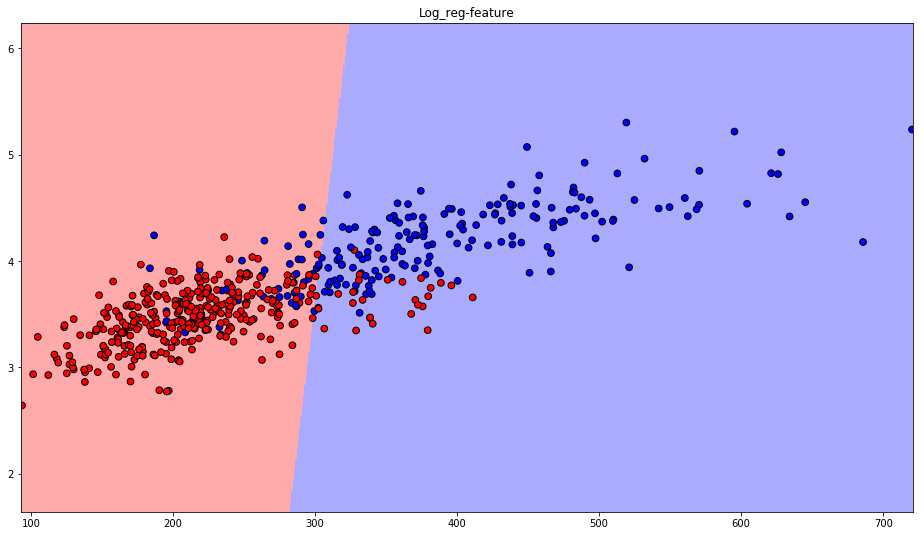

In [22]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


z3 = log_reg.predict(np.c_[xx2.ravel(), yy2.ravel()])

# Put the result into a color plot
z3 = z3.reshape(xx2.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx2, yy2, z3, cmap=cmap_light)

# Plot also the training points
plt.scatter(x3.iloc[:, 0], x3.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx2.min(), xx2.max())
plt.ylim(yy2.min(), yy2.max())
plt.title("Log_reg-feature")
plt.show()

In [23]:
#The decision boundary smoothened and thus improved to a very great extent due to the engineered features

In [24]:
x4_1=x2.drop(['radius.mean','mult'],axis=1)

In [25]:
x4_1

,texture.mean,sqrt
0,10.38,4.241462
1,17.77,4.535416
2,21.25,4.437342
3,20.38,3.379349
4,14.34,4.504442
5,15.70,3.528456
6,19.98,4.272002
7,20.83,3.702702
8,21.82,3.605551
9,24.04,3.529873


In [26]:
log_reg.fit(x4_1,y)
#Plotting decision regions
x_min3, x_max3 = x4_1.iloc[:, 0].min() - 1, x4_1.iloc[:, 0].max() + 1
y_min3, y_max3 = x4_1.iloc[:, 1].min() - 1, x4_1.iloc[:, 1].max() + 1

xx3, yy3 = np.meshgrid(np.arange(x_min3, x_max3, 0.1), np.arange(y_min3, y_max3, 0.1))

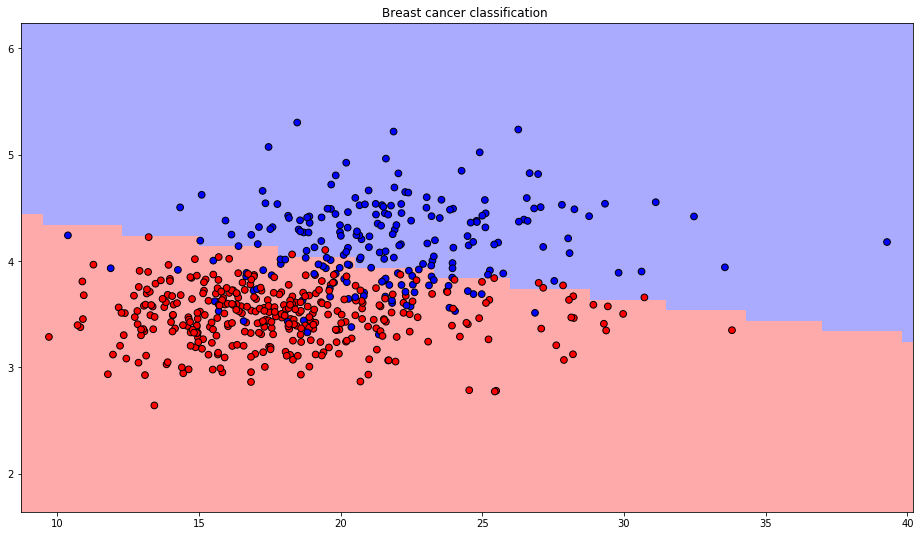

In [27]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


z4 = log_reg.predict(np.c_[xx3.ravel(), yy3.ravel()])

# Put the result into a color plot
z4 = z4.reshape(xx3.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx3, yy3, z4, cmap=cmap_light)

# Plot also the training points
plt.scatter(x4_1.iloc[:, 0], x4_1.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx3.min(), xx3.max())
plt.ylim(yy3.min(), yy3.max())
plt.title("Breast cancer classification ")
plt.show()

3. Use Full data

3.1 Cross validation

In [28]:
nx=data.iloc[:,2:]
#All columns

In [29]:
log_reg.fit(nx,y)
pred5=log_reg.predict(nx)

Initial accuracy scores, recall and precision scores.

In [30]:
metrics.accuracy_score(y,pred5)

0.9595782073813708

In [31]:
metrics.precision_score(y,pred5)

0.9565217391304348

In [32]:
metrics.recall_score(y,pred5)

0.9339622641509434

Averaged accuracy scores, recall and precision scores.

In [33]:
cross_val_score(log_reg,nx,y,cv=10,scoring='accuracy').mean()

0.9491454930429521

In [34]:
cross_val_score(log_reg,nx,y,cv=10,scoring='precision').mean()

0.947902661792822

In [35]:
cross_val_score(log_reg,nx,y,cv=10,scoring='recall').mean()

0.9158008658008658

In [36]:
from sklearn.model_selection import KFold

Y1 = data['diagnosis']
cols = [col for col in data.columns if col!= 'diagnosis' if col!='id']
X2= data[cols]
log_score = []
re_score = []
pre_score = []
kf = KFold(n_splits=10)

for train,test in kf.split(data):
    x_train = X2.loc[train]
    y_train = Y1.loc[train]
    x_test = X2.loc[test]
    y_test = Y1.loc[test]
    logistic = LogisticRegression().fit(x_train,y_train)
    logistic.predict(x_test)
    log_score.append(accuracy_score(y_test,logistic.predict(x_test)))
    re_score.append(metrics.recall_score(y_test,logistic.predict(x_test)))
    pre_score.append(metrics.precision_score(y_test,logistic.predict(x_test)))
    #print(precision_recall_fscore_support(x_test,y_test))
print("Accuracy Score : ",np.mean(log_score))
print("Recall Score : ",np.mean(re_score))
print("Precision Score : ",np.mean(pre_score))

Accuracy Score :  0.9490601503759397
Recall Score :  0.9286325087955524
Precision Score :  0.9308516483516485


3.2 Regularization

In [37]:
#Lasso regression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Function for calculating cross validation accuracy scores for different values of lambda
def lamb(lam):
    log1=LogisticRegression(penalty='l1',C=1/lam)
    log1.fit(nx,y)
    y_pred=log1.predict(nx)
    return cross_val_score(log1,nx,y,cv=15,scoring='accuracy').mean()

In [39]:
#Different averaged CV accuracy scores for different values of lambda

acc=[]
for i in (0.0001,0.001,0.01,0.1,0.5,1,10,25,100):
    acc.append(lamb(i))
acc    

[0.965047233468286,
 0.9667067877594192,
 0.9631505999927052,
 0.9630581999003051,
 0.9490705280178965,
 0.9491155122734071,
 0.933273759589549,
 0.9333211754264387,
 0.9208957945800051]

In [40]:
#Function for calculating cross validation precision scores for different values of lambda
def lamb2(lam):
    log1=LogisticRegression(penalty='l1',C=1/lam)
    log1.fit(nx,y)
    y_pred=log1.predict(nx)
    return cross_val_score(log1,nx,y,cv=15,scoring='precision').mean()

In [41]:
#Different averaged CV precision scores for different values of lambda

prec=[]
for i in (0.0001,0.001,0.01,0.1,0.5,1,10,25,100):
    prec.append(lamb2(i))
prec  

[0.9458506308506309,
 0.9589293495175848,
 0.9547039072039073,
 0.9606162464985996,
 0.9508216619981327,
 0.958452380952381,
 0.9402777777777779,
 0.9520360195360197,
 0.9414133089133089]

In [42]:
#Function for calculating cross validation recall scores for different values of lambda
def lamb3(lam):
    log1=LogisticRegression(penalty='l1',C=1/lam)
    log1.fit(nx,y)
    y_pred=log1.predict(nx)
    return cross_val_score(log1,nx,y,cv=15,scoring='recall').mean()

In [43]:
#Different averaged CV recall scores for different values of lambda

recall=[]
for i in (0.0001,0.001,0.01,0.1,0.5,1,10,25,100):
    recall.append(lamb3(i))
recall  

[0.9526984126984127,
 0.9526984126984127,
 0.947936507936508,
 0.9431746031746032,
 0.9146031746031746,
 0.9146031746031746,
 0.8822222222222224,
 0.867936507936508,
 0.8444444444444447]

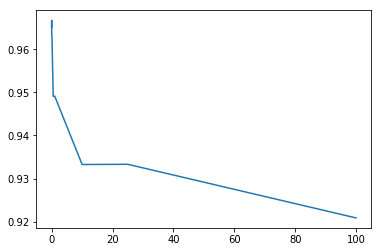

In [44]:
lambval=[0.0001,0.001,0.01,0.1,0.5,1,10,25,100]
#Averaged CV Accuracy scores vs Lambda values 
plt.plot(lambval,acc)

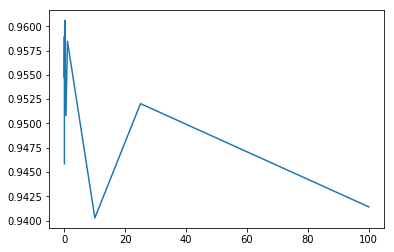

In [45]:
#Averaged CV Precision scores vs Lambda values 
plt.plot(lambval,prec)

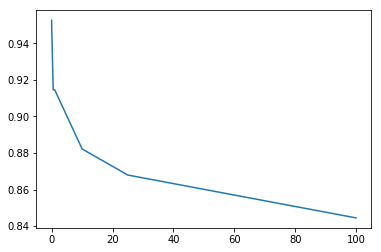

In [46]:
#Averaged CV Recall scores vs Lambda values 
plt.plot(lambval,recall)

The best regularization parameter was found to be at the value of 0.001 as the best values of CV accuracy,precision and recall were found at this value.
Best Accuracy score : 0.9685560053981105
Best precision value : 0.9633737939620293
Best recall value : 0.9526984126984127

In [47]:
#Regularization on all parameters using split data::

from sklearn.cross_validation import train_test_split
#predictor X
X=data.as_matrix(columns=data.columns[2:])

y=data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [48]:
from sklearn import linear_model
#perform ridge regression and test accuracy
mod = linear_model.LogisticRegression(penalty='l2',C=100000)

mod.fit(X_train,y_train)

yhat=mod.predict(X_test)
accuracy_score(y_test, yhat)

0.958041958041958

In [49]:
def ridge_reg(c):
    mod = linear_model.LogisticRegression(penalty='l2',C=c)
   
    
    mod.fit(X_train,y_train)


    yhat = mod.predict(X_test)

    a = accuracy_score(y_test,yhat)
    b =metrics.recall_score(y_test,yhat)
    c =metrics.precision_score(y_test,yhat)
    coeff = mod.coef_
    
    return (a,coeff)



c=[1000000,100000,10000,1000,100,0.01,0.001,0.0001,0.00001,0.000001]

lam=[0.000001,0.00001,0.0001,0.001,0.01,100,1000,10000,100000,1000000]
l = []

df = pd.DataFrame(columns=['radius.mean', 'texture.mean', 'perimeter.mean', 'area.mean',
       'smoothness.mean', 'compactness.mean', 'concavity.mean',
       'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se',
       'texture.se', 'perimeter.se', 'area.se', 'smoothness.se',
       'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se',
       'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst',
       'area.worst', 'smoothness.worst', 'compactness.worst',
       'concavity.worst', 'concpoints.worst', 'symmetry.worst',
       'fracdim.worst'])
#df = pd.DataFrame(columns=['radius.mean', 'texture.mean'])
for i in range(10):
    a,coeff = ridge_reg(c[i])
    l.append(a)
    df.loc[i] = coeff[0]
    
data1 = pd.DataFrame({'Accuracy':l,'lambda':lam})
final = [data1,df]

final=pd.concat([data1,df],axis=1)
final

,Accuracy,lambda,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,0.965035,0.000001,-4.091820,-0.132230,0.298645,0.009681,1.692038,6.261741e-01,1.480733,2.753837,...,-0.950330,0.437891,0.072123,0.023925,2.758725,1.620903,3.260761,5.286862,5.629011,0.023790
1,0.958042,0.000010,-3.672585,-0.105061,0.146591,0.017123,2.562388,3.210517e-01,1.672350,4.149592,...,-0.437807,0.395526,0.096530,0.015820,4.168908,0.643827,3.447566,7.965572,7.213086,-0.199902
2,0.958042,0.000100,-3.922295,-0.129755,0.205166,0.015900,2.385806,4.483710e-01,1.745691,3.849968,...,-0.593008,0.445388,0.076996,0.018716,3.887492,1.105817,3.892892,7.425888,7.060604,-0.115750
3,0.958042,0.001000,-3.209571,-0.023847,0.170050,0.008042,3.922180,-3.207495e-01,1.989188,6.542516,...,-0.852299,0.306573,0.126049,0.019570,6.335855,-1.483364,2.946282,12.405388,8.600689,-0.626803
4,0.958042,0.010000,-3.303385,-0.112332,0.085110,0.017722,2.330795,3.133567e-01,1.703677,3.758814,...,-0.229580,0.397967,0.052390,0.017120,3.796376,0.755557,3.958120,7.265028,6.669734,-0.146836
5,0.930070,100.000000,-0.112049,-0.010180,-0.271614,-0.002500,0.001769,1.189145e-02,0.017188,0.007146,...,-0.116541,0.103322,0.065229,0.023197,0.003823,0.040368,0.051349,0.014999,0.011105,0.003265
6,0.937063,1000.000000,-0.023447,0.003909,-0.094750,-0.016262,0.000059,1.324950e-03,0.002049,0.000860,...,-0.024341,0.023432,-0.050962,0.028557,0.000259,0.004654,0.005971,0.001735,0.000900,0.000273
7,0.930070,10000.000000,-0.007129,-0.007646,-0.038872,-0.016726,-0.000053,1.030128e-04,0.000224,0.000099,...,-0.007349,-0.008224,-0.035931,0.021893,-0.000055,0.000393,0.000572,0.000165,-0.000085,-0.000025
8,0.895105,100000.000000,-0.002370,-0.004286,-0.014156,-0.009883,-0.000024,-5.861662e-07,0.000026,0.000013,...,-0.002381,-0.005383,-0.013935,0.010829,-0.000031,0.000015,0.000050,0.000014,-0.000063,-0.000020
9,0.902098,1000000.000000,-0.000485,-0.000917,-0.002960,-0.003605,-0.000005,-1.424053e-06,0.000003,0.000002,...,-0.000465,-0.001156,-0.002818,0.003494,-0.000007,-0.000001,0.000004,0.000001,-0.000013,-0.000004


4 ROC curve: which estimator is the best

In [50]:
#split into test_training

X_train,X_test,y_train,y_test=train_test_split(nx,y,test_size=0.33,random_state=4)
#logistic regression model using best parameters 
logf=LogisticRegression(penalty='l1',C=1/0.001)
logf.fit(X_train,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

(array([116.,   4.,  68.]),
 array([2.17410275e-24, 3.33333333e-01, 6.66666667e-01, 1.00000000e+00]),
 <a list of 3 Patch objects>)

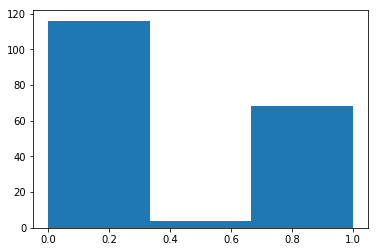

In [51]:
lpred=logf.predict_proba(X_test)[:,1]
plt.hist(lpred,bins=3)

In [52]:
from sklearn.preprocessing import scale
nxs=scale(nx)
#KNN Model using scaled data
#split scaled data into test_training

X_train2,X_test2,y_train2,y_test2=train_test_split(nxs,y,test_size=0.33,random_state=4)
wisc_clf.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

(array([120.,   9.,  59.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

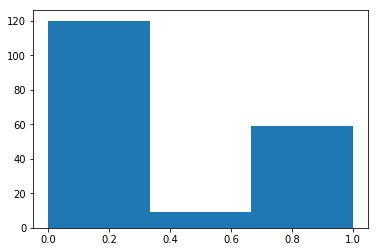

In [53]:
kpred=wisc_clf.predict_proba(X_test2)[:,1]
plt.hist(kpred,bins=3)

In [54]:
#Naive Based Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
GaussianNB(priors=None)
npred=nb.predict_proba(X_test)[:,1]

Threshold implementation

1. Logistic Regression

In [55]:
#False positive rates and true positive rates for the model
fpr,tpr,threshold=metrics.roc_curve(y_test,lpred)
fpr
tpr

array([0.73333333, 0.86666667, 0.86666667, 0.93333333, 0.93333333,
       0.95      , 0.95      , 0.96666667, 0.96666667, 0.98333333,
       0.98333333, 1.        , 1.        ])

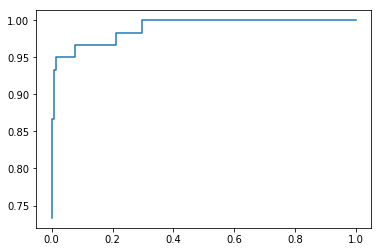

In [56]:
#ROC Before Threshold
plt.plot(fpr,tpr)

In [57]:
#Threshold change to 0.1,0.3,0.5,0.8 i.e. any value above 0.1,0.3,0.5,0.8 changes to 1
from sklearn.preprocessing import binarize
binarize([lpred],0.3)[0]

array([1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0.])

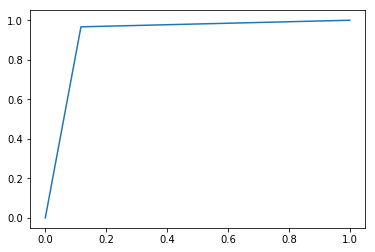

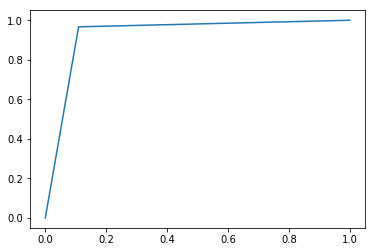

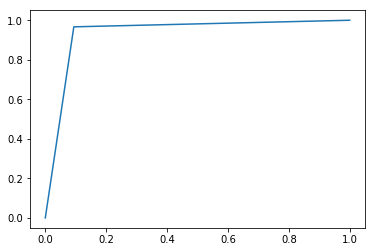

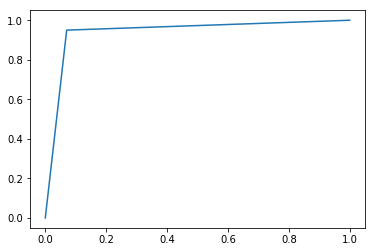

In [58]:
#ROC plot after enforcing threshold
for i in (0.1,0.3,0.5,0.8):
    lpred_new=binarize([lpred],i)[0]
    fpr2,tpr2,threshold2=metrics.roc_curve(y_test,lpred_new)
    plt.plot(fpr2,tpr2)
    plt.show()

2. KNN

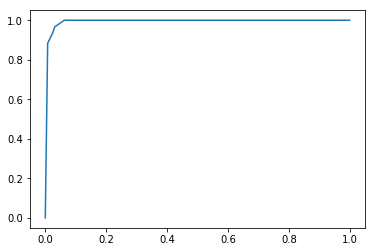

In [59]:
#False positive rates and true positive rates for the model
fpr3,tpr3,threshold3=metrics.roc_curve(y_test2,kpred)
fpr3
tpr3

#ROC Before Threshold
plt.plot(fpr3,tpr3)

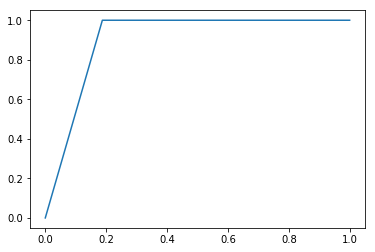

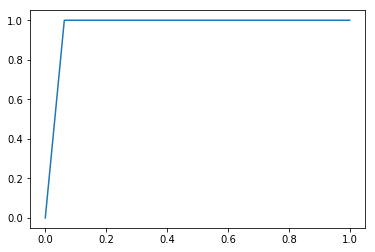

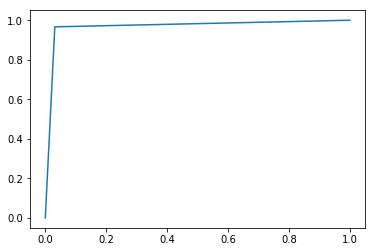

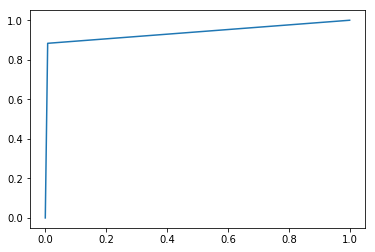

In [60]:
#ROC plot after enforcing threshold
for i in (0.1,0.3,0.5,0.8):
    kpred_new=binarize([kpred],i)[0]
    fpr4,tpr4,threshold4=metrics.roc_curve(y_test2,kpred_new)
    plt.plot(fpr4,tpr4)
    plt.show()

3. Naive Bayes

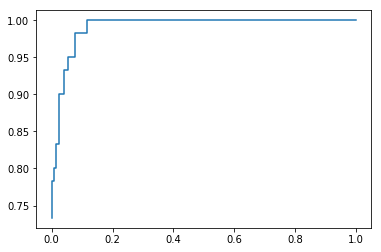

In [61]:
#False positive rates and true positive rates for the model
fpr5,tpr5,threshold5=metrics.roc_curve(y_test,npred)
fpr5
tpr5
#ROC Before Threshold
plt.plot(fpr5,tpr5)

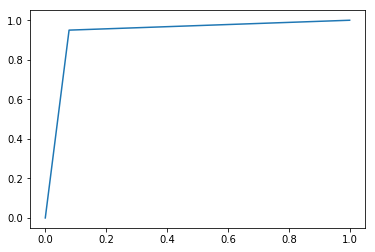

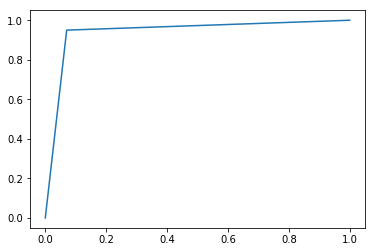

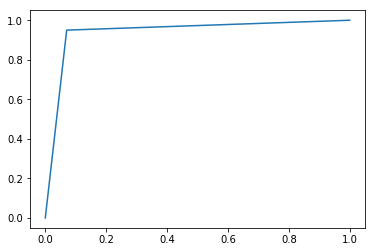

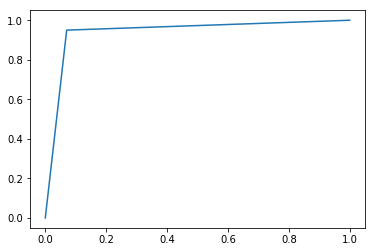

In [62]:
#ROC plot after enforcing threshold
for i in (0.1,0.3,0.5,0.8):
    npred_new=binarize([npred],i)[0]
    fpr6,tpr6,threshold6=metrics.roc_curve(y_test,npred_new)
    plt.plot(fpr6,tpr6)
    plt.show()

We can have a threshhold value of 0.3 in this case - we can include false positives but false negatives cannot be ignored as it may lead to the cancer being undetected.
The sensitivity should be increased to optimize the problem.
KNN model has a good ROC and maximum AUC.


In [66]:
#logistic Regression:
print(metrics.accuracy_score(y_test,logf.predict(X_test)))
#KNN:
print(metrics.accuracy_score(y_test2,wisc_clf.predict(X_test2)))
#Naive Bayes:
print(metrics.accuracy_score(y_test,nb.predict(X_test)))

0.7021276595744681
0.9680851063829787
0.35638297872340424


As seen in the final results above, KNN gives the highest model accuracy after the data is scaled.

In [65]:


# from sklearn.cross_validation import train_test_split
# #predictor X
# # X=data.as_matrix(columns=data.columns[2:])
# # # cols = [col for col in data.columns if col!= 'diagnosis' if col!='id']
# # # X= data[cols]
# nxs=scale(nx)
# # y=data['diagnosis']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# X_train,X_test,y_train,y_test=train_test_split(nxs,y,test_size=0.33,random_state=0)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)


# # false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
# y_pred_nb_p =nb.predict_proba(X_test)[:,1]
# y_pred_lgr_p =log_reg.predict_proba(X_test)[:,1]
# y_pred_knn_p =wisc_clf.predict_proba(X_test)[:,1]




# models=[y_pred_knn_p,y_pred_lgr_p,y_pred_nb_p]
# label=['KNN','Logistic','Naive Bayes']

# # plotting ROC curves
# plt.figure(figsize=(10, 8))
# m=np.arange(3)
# for m in m:
#     fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
#     print('model:',label[m])
#     print('thresholds:',np.round(thresholds,3))
#     print('tpr:       ',np.round(tpr,3))
#     print('fpr:       ',np.round(fpr,3))
#     plt.plot(fpr,tpr,label=label[m])
# plt.xlim([0,1.0])
# plt.ylim([0,1.0])
# plt.title('ROC curve for Cancer classifer')
# plt.xlabel('False positive rate (1-specificity)')
# plt.ylabel('True positive rate (sensitivity)')
# plt.legend(loc=4,)